In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

In [4]:
df=pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,113.949997,118.989998,112.680000,112.820000,111.289726,231366600
1,2020-09-09,117.260002,119.139999,115.260002,117.320000,115.728691,176940500
2,2020-09-10,120.360001,120.500000,112.500000,113.489998,111.950661,182274400
3,2020-09-11,114.570000,115.230003,110.000000,112.000000,110.480843,180860300
4,2020-09-14,114.720001,115.930000,112.800003,115.360001,113.795280,140150100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,129.063334,130.507104,127.582420,129.070952,127.721081,1.027298e+08
std,11.192471,11.113959,11.405234,11.359554,11.436435,3.861931e+07
min,104.540001,110.190002,103.099998,106.839996,105.390831,4.639770e+07
25%,120.500000,122.042498,118.990000,120.679998,119.322788,7.631650e+07
50%,127.820000,128.715004,126.399998,127.619999,126.303799,9.366130e+07
75%,135.737496,136.552505,133.710003,135.025005,133.636784,1.168119e+08
max,154.970001,157.259995,154.389999,156.690002,155.558823,2.871049e+08


رسم بيانات سعر الاغلاق:

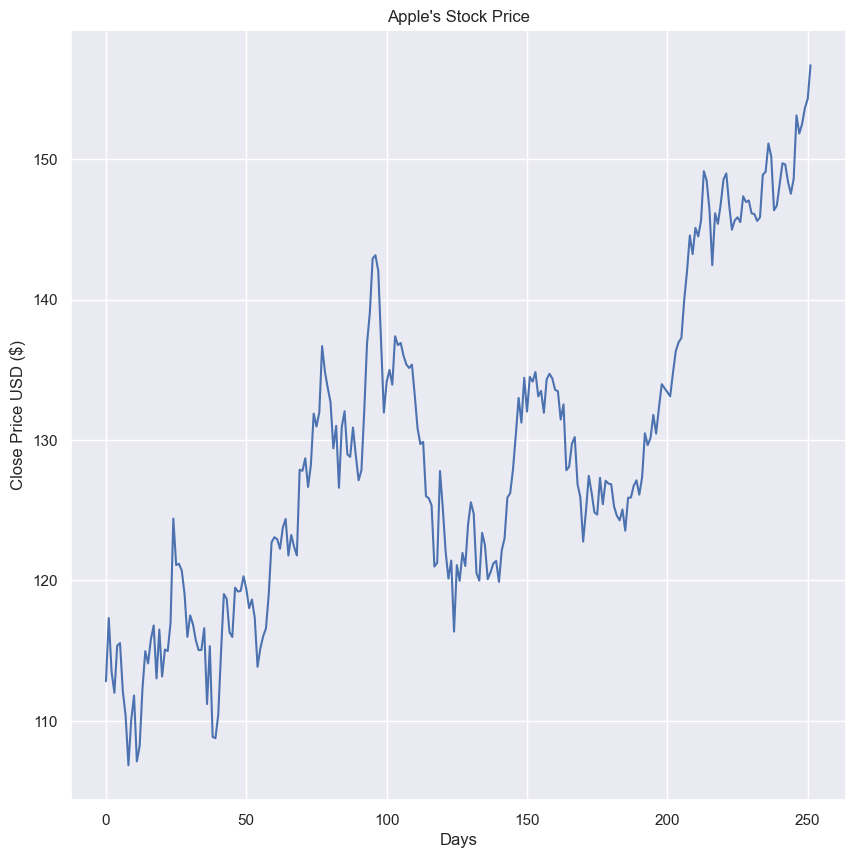

In [64]:
sns.set()
plt.figure(figsize=(10,10))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.show()

# create  variable for X days predict in future :

In [13]:
futureDays=25

create new column to convert X 

In [17]:
df["prediction"] =df[["Close"]].shift(-futureDays)
df.head()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,prediction
247,2021-08-31,152.660004,152.800003,151.289993,151.830002,150.733902,86453100,NaN
248,2021-09-01,152.830002,154.979996,152.339996,152.509995,151.408997,80313700,NaN
249,2021-09-02,153.869995,154.720001,152.399994,153.649994,152.540771,71115500,NaN
250,2021-09-03,153.759995,154.630005,153.089996,154.300003,153.186081,57808700,NaN
251,2021-09-07,154.970001,157.259995,154.389999,156.690002,155.558823,82278300,NaN


create training array

In [70]:
X=np.array(df.drop(["Date","prediction"],axis=1))[:-futureDays]
X.shape

(227, 6)

create target  array data (y)

In [29]:
y=np.array(df["prediction"])[:-futureDays]
y.shape

(227,)

split data to train and test

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [31]:
#create decsion tree regressor model
tree= DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

Create linear model regresion model

In [32]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [43]:
xfuture= df.drop(["prediction","Date"],axis=1)[:-futureDays]
xfuture=xfuture.tail(futureDays)
xfuture=np.array(xfuture)
print(xfuture)

[[1.33410004e+02 1.35250000e+02 1.33350006e+02 1.34779999e+02
  1.33606827e+02 6.21113000e+07]
 [1.34800003e+02 1.36490005e+02 1.34350006e+02 1.36330002e+02
  1.35143326e+02 6.45561000e+07]
 [1.36169998e+02 1.37410004e+02 1.35869995e+02 1.36960007e+02
  1.35767838e+02 6.32614000e+07]
 [1.36600006e+02 1.37330002e+02 1.35759995e+02 1.37270004e+02
  1.36075165e+02 5.24858000e+07]
 [1.37899994e+02 1.40000000e+02 1.37750000e+02 1.39960007e+02
  1.38741714e+02 7.88526000e+07]
 [1.40070007e+02 1.43149994e+02 1.40070007e+02 1.42020004e+02
  1.40783813e+02 1.08181800e+08]
 [1.43539993e+02 1.44889999e+02 1.42660004e+02 1.44570007e+02
  1.43311615e+02 1.04911600e+08]
 [1.41580002e+02 1.44059998e+02 1.40669998e+02 1.43240005e+02
  1.41993179e+02 1.05575500e+08]
 [1.42750000e+02 1.45649994e+02 1.42649994e+02 1.45110001e+02
  1.43846878e+02 9.98908000e+07]
 [1.46210007e+02 1.46320007e+02 1.44000000e+02 1.44500000e+02
  1.43242218e+02 7.62997000e+07]
 [1.44029999e+02 1.47460007e+02 1.43630005e+02 1.4

In [46]:
# tree prdection 
treepredict=tree.predict(xfuture)
treepredict.shape

(25,)

In [94]:
pr_tr= tree.predict(X_test)
sco=MSE(y_test,pr_tr)
sco

92.24169193686775

In [86]:
LRpredict= LR.predict(xfuture)
LRpredict


array([142.77265099, 142.82698654, 143.13245279, 142.71434805,
       143.91390239, 144.92752445, 144.73884869, 144.55158384,
       145.40364246, 144.13685324, 145.68661327, 146.24038535,
       145.18986518, 144.85096132, 143.8905559 , 145.50213622,
       144.88088922, 145.89638706, 145.6415629 , 145.96615911,
       144.1232681 , 144.48142117, 145.40614906, 145.31015772,
       144.90378877])

In [92]:
pr= LR.predict(X_test)
score=MSE(y_test,pr)
score

42.30287519782754

# plot Tree Decision prediction


In [84]:

predictions=treepredict
valid= df[X.shape[0]:]
valid["predictions"]=predictions

C:\Users\ha\AppData\Local\Temp\ipykernel_15288\3160809181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"]=predictions


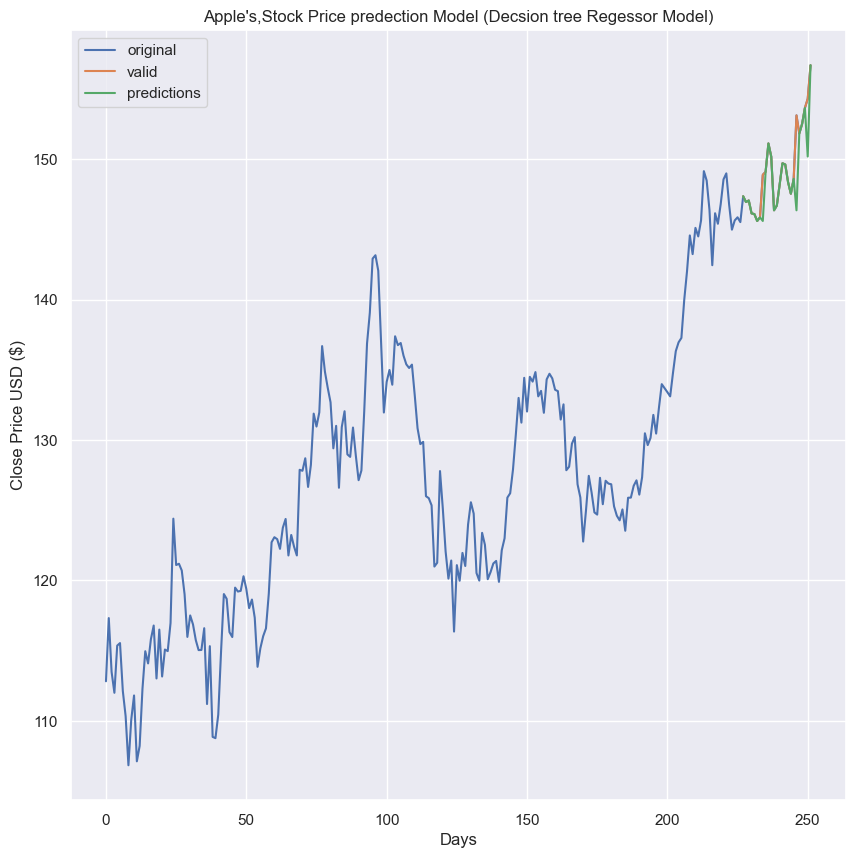

In [77]:
plt.figure(figsize=(10,10))
plt.title("Apple's,Stock Price predection Model (Decsion tree Regessor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["original","valid","predictions"])
plt.show()


In [80]:
predictions=LRpredict
valid=df[X.shape[0]:]
valid["predictions"]=predictions
valid.head()

C:\Users\ha\AppData\Local\Temp\ipykernel_15288\1735680547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"]=predictions


,Date,Open,High,Low,Close,Adj Close,Volume,prediction,predictions
227,2021-08-03,145.809998,148.039993,145.179993,147.360001,146.077316,64786600,NaN,142.772651
228,2021-08-04,147.270004,147.789993,146.279999,146.949997,145.670883,56368300,NaN,142.826987
229,2021-08-05,146.979996,147.839996,146.169998,147.059998,145.779922,46397700,NaN,143.132453
230,2021-08-06,146.350006,147.110001,145.630005,146.139999,145.084991,54126800,NaN,142.714348
231,2021-08-09,146.199997,146.699997,145.520004,146.089996,145.035339,48908700,NaN,143.913902


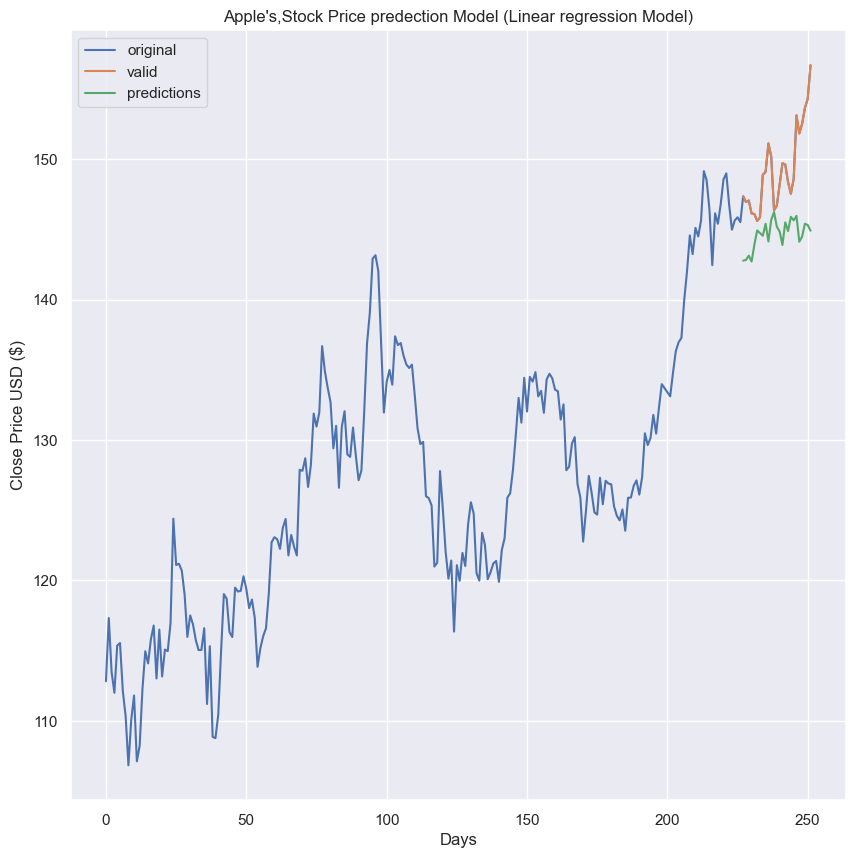

In [83]:
plt.figure(figsize=(10,10))

plt.title("Apple's,Stock Price predection Model (Linear regression Model)")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["original","valid","predictions"])
plt.show()